In [7]:
#텐서(Tensor) 생성연산 
# 덧셈, 행렬곱 등)
# GPU 사용 모델 훈련
import torch
# nn.Linear() : 완전연결층
# nn.Conv2d() : 합성곱층 
# nn.ReLU() : 활성화 함수
# nn.CrossEntropyLoss() : 손실 함수
import torch.nn as nn
# optim.SGD() : 확률적 경사하강법 
# optim.Adam() : 아담 옵티마이저 (많이 씀)
import torch.optim as optim
# torchvision.datasets.FashionMNIST
# torchvision.models.resnet18()
# torchvision.transforms
import torchvision
import torchvision.transforms as transforms

# 1. 하이퍼파라미터 설정
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [2]:
# 여러 개의 변환(Transform)을 순서대로 묶는 것
transform = transforms.Compose([
    # 이미지 파일을 PyTorch 텐서로 변경
    # Fashion-MNIST 이미지는 0~255 범위 -> 픽셀값을 0~1 사이로 나누어 스케일링
    transforms.ToTensor(),
    # mean=0.5	0.5만큼 빼서 중심을 0으로 이동
    # std=0.5	0.5로 나눠서 범위를 2배 키움
    # 평균을 0 근처로 이동시키고, 값 범위를 [-1, 1]로 조정
    transforms.Normalize((0.5,), (0.5,))
    # .5로 나누는 것은 (0~1로 스케일된) 픽셀 값을 2배로 확대하는 것과 동일하여, 
    # 최소 0은 -1로, 최대 1은 +1로 매핑됩니다. 이렇게 **균일한 범위 [-1,1]**를 
    # 가지면 신경망의 활성화 함수(예: 시그모이드, tanh 등)의 작동 구간을 효율적으로 사용할 수 있게
    # 입력 특성들을 평균 0, 분산 1로 맞추면 경사하강 등 최적화 과정의 수렴이 빨라짐
    # 0.5로 정규화하면 모든 픽셀이 대략 -1에서 1 사이로 분포하게 되어, 특성이 비슷한 범위를 가져 학습이 안정
])

In [15]:
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
class SimpleCNN(nn.Module):
# CNN 의 세가지 요소

# Neural Network	인공신경망 (가중치 기반으로 학습하는 함수 모델)
# ① Convolution Layer (합성곱 층)	특징 추출	필터(커널)로 이미지를 훑어서 특징(feature)을 뽑는다
# ② Non-Linearity (비선형성, 활성화 함수)	복잡한 패턴 인식	Conv 결과에 비선형 함수(ReLU 등)를 적용해서 복잡한 패턴을 학습할 수 있게 한다
# ③ Pooling Layer (풀링 층)	축소 및 요약	특징 맵(feature map) 크기




# 입력:
# 1 2 3
# 4 5 6
# 7 8 9

# 필터:
# 1 0
# 0 -1

# Conv 레이어의 필터는 학습을 통해 '특정 패턴'을 감지하는 값을 갖게 됩니다.

# 그리고 이 값들은 초기에는 랜덤하게 시작하고,
# 학습이 진행될수록 엣지, 텍스처, 형태 같은 특징을 잘 잡는 형태로 변해갑니다.
# 필터 값을 계속 수정(업데이트) 합니다.


# 1*1 + 2*0 + 4*0 + 5*(-1) = 1 - 5 = -4



    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)

# Convolutional	합성곱(convolution) 연산을 기반으로 한
# 지역성(locality)	이미지의 일부분(로컬)을 보고 특징을 추출함
# 가중치 공유	필터 하나로 전체 이미지를 훑으니 파라미터 수가 줄어듦
# 계층적 특징 학습	아래에서는 엣지, 위로 갈수록 윤곽 → 의미 있는 형태 추출 가능
# 불변성 (shift-invariant)	물체가 약간 이동해도 잘 인식함 (위치에 덜 민감)

# 1 (in_channels)	입력 채널 수 = 1개 (흑백 이미지)
# 32 (out_channels)	출력 채널 수 = 32개 (필터 개수, 즉 특징맵 수)

# kernel_size=3	3x3 크기의 필터(커널)를 사용
# 딥러닝 연구/실험에서 3x3, 5x5 같은 정사각형 필터가
# 대부분의 문제(이미지 분류, 객체 인식 등)에서 가장 좋은 성능을 보임
# 수평/수직 방향 모두 균등하게 정보를 다루기 위해서
# 특수한 경우에는 (1,3)이나 (3,1) 커널을 쓰기도 함

# padding=1	입력 주변에 1픽셀씩 0을 덧붙여서 크기를 유지 (same padding)
# 패딩 없이 하면 출력은 26×26이 됩니다.
# 특징 손실을 막기 위해

# 1 1 1 1 1
# 1 2 2 2 1
# 1 2 9 2 1
# 1 2 2 2 1
# 1 1 1 1 1

# 여기에 패딩=1을 주면, 테두리에 0을 붙임

# 0 0 0 0 0 0 0
# 0 1 1 1 1 1 0
# 0 1 2 2 2 1 0
# 0 1 2 9 2 1 0
# 0 1 2 2 2 1 0
# 0 1 1 1 1 1 0
# 0 0 0 0 0 0 0


# 패딩을 붙이면 가장자리(테두리) 정보는 왜곡되고, 실제로 점수가 다르게(낮게) 나오는 경향이 있음


        self.pool = nn.MaxPool2d(2, 2)

# Pooling의 가장 기본적인 목적은 바로 "데이터 크기를 줄이는 것"

# 특징 요약 (Feature Summarization)	중요한 특징만 뽑아내고, 덜 중요한 정보(노이즈)는 버림
# 연산 속도 향상	작아진 데이터로 다음 합성곱 계산 → 연산량 크게 줄어듦
# 과적합 방지 도움	덜 복잡한 데이터 → 모델이 학습할 때 과적합 위험이 줄어듦

# 모델이 복잡할수록 데이터에 "쓸데없이" 딱 맞춰버리기 쉽기 때문입니다.
# 그래서 단순할수록 더 일반화가 잘 됩니다.

# 과적합 발생 이유

# 과적합 발생 원인	
# 모델이 너무 복잡할 때	: 파라미터(가중치)가 많아서 훈련 데이터를 "완벽하게 외워버림"
# 데이터가 너무 적을 때	: 샘플이 적으니 모델이 "작은 데이터의 특징"까지 과하게 학습
# 데이터에 잡음(노이즈)이 많을 때 :	훈련 데이터에 우연한 특성(노이즈)까지 따라하게 됨
# 에폭 수가 너무 많을 때 :	너무 오래 학습해서 결국 "노이즈"까지 학습해버림
# 정규화(규제)가 없을 때 :	모델이 자유롭게 과하게 학습해도 아무런 제약이 없음
# 데이터 다양성이 부족할 때 :	비슷한 데이터만 보면 패턴이 뻔해져서, 새로운 데이터에 약함

# 1. 더 많은 데이터 수집
# 데이터가 많으면 모델이 노이즈보다 진짜 패턴을 학습할 확률이 높아짐

# 항상 최고의 방법이지만, 쉽지는 않음

# 2. 데이터 증강
# 특히 이미지/음성/텍스트 데이터에 필수

# ex: 이미지 회전, 잘라내기, 밝기 조정 → 데이터 다양성 증가

# 3. 모델 단순화
# 너무 깊거나 복잡한 모델은 작은 데이터까지 외워버림

# 작고 심플한 모델은 핵심만 학습

# 4. 정규화 (L1, L2)
# 손실함수에 가중치 크기를 벌칙으로 추가

# L1: 가중치 절댓값 합, L2: 가중치 제곱합

# 5. 드롭아웃 (Dropout)
# 학습할 때 무작위로 뉴런을 끄는 기술

# 네트워크가 특정 뉴런에 의존하지 않게 만듦 → 더 튼튼한 학습

# 6. 조기 종료 (Early Stopping)
# 검증 데이터의 loss가 다시 올라가면 과적합 시작된 것 → 그 순간 학습 멈춤

# validation loss 모니터링 필수

# 7. 배치 정규화 (BatchNorm)
# 은닉층의 입력 분포를 일정하게 맞춰주기

# 학습이 빠르고 일반화가 잘 되는 경우가 많음 (단, 꼭 과적합 방지용은 아님)


# 약간의 위치 불변성	조금 위치가 변해도 (ex: 이미지가 살짝 움직여도) 결과가 비슷하게 나오게 함

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

# fc1	(3136 → 128)	Conv 결과(64채널×7×7)를 128차원으로 요약
# fc2	(128 → 10)	요약된 128차원 특징을 10개 클래스 점수(logits) 로 변환
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))


# 합성곱 이후에 ReLU를 적용하는 이유는
# 비선형성(Non-linearity)을 추가해서 모델이 복잡한 패턴을 학습할 수 있게 하기 위해
# ReLU를 통과하면 통계적으로 절반(약 50%) 정도의 뉴런 출력이 0이 될 확률이 높다.
# 정규화(normalization) 는 ReLU의 좋은 특성(희소성, 균형)을 살려주기 위한 사전 작업이기도 함.

# (1) 입력 정규화 → 음수+양수 데이터
# (2) Conv → 음수 결과도 생김
# (3) ReLU → 음수 다 0 → 양수만 통과
# (4) 결과 → 희소(sparse)하고, 빠른 학습 가능

# 이건 밀집(Dense) 데이터 (거의 0이 없음):

# csharp
# 복사
# 편집
# [3, 5, 1, 2, 7]
# 이건 희소(Sparse) 데이터 (대부분 0):

# csharp
# 복사
# 편집
# [0, 0, 5, 0, 0]
# 희소: 대부분 0이고, 중요한 정보(5 같은 것)만 살아있음.

# 장점	
# 연산량이 줄어듦	0은 연산할 필요 없으니까 계산 빨라짐
# 특성이 명확해짐	정말 중요한 부분만 살아남음 (노이즈 제거 효과)
# 과적합 방지 도움	덜 복잡한(적은 수의) 특징만 학습함
# 메모리 효율성	나중에 sparse matrix로 저장하면 메모리 아끼기도 가능




        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

# 합성곱(Conv)	특징(feature) 추출
# 풀링(Pooling)	중요한 특징만 요약
# 완전 연결(Fully Connected)	추출된 특징을 종합해서 결정(decision) 내림

# Conv로 뽑은 "지역 정보(Local Features)"들을 모두 종합해서,
# 최종적으로 "전역 의미(Global Meaning)"로 바꿔주는 역할

        return x

model = SimpleCNN()

In [ ]:
model = SimpleCNN()

# 4. 손실 함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 5. 모델 학습
for epoch in range(num_epochs):
    
     # 학습할 때 사용하는 모드 (Training Mode)
    model.train() 
   
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/10], Loss: 0.7343
Epoch [2/10], Loss: 0.4478
Epoch [3/10], Loss: 0.3755
Epoch [4/10], Loss: 0.3306
Epoch [5/10], Loss: 0.2940
Epoch [6/10], Loss: 0.2636
Epoch [7/10], Loss: 0.2345
Epoch [8/10], Loss: 0.2089
Epoch [9/10], Loss: 0.1859
Epoch [10/10], Loss: 0.1654


In [16]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test data: {100 * correct / total:.2f}%')

Accuracy on test data: 93.45%


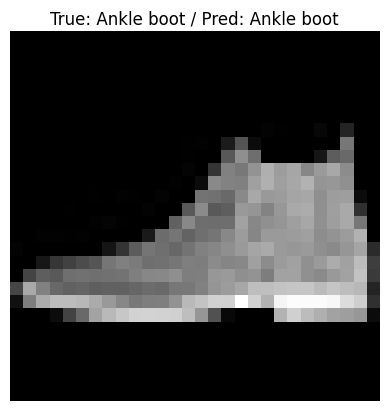

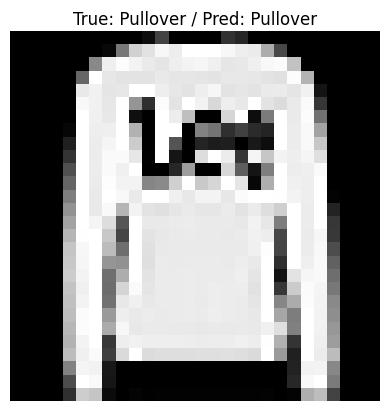

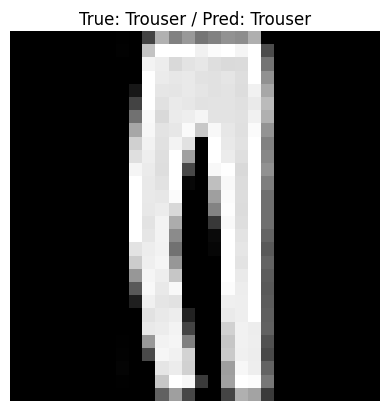

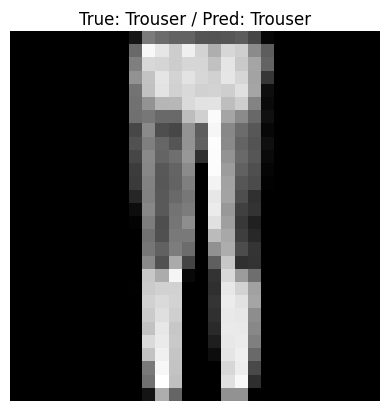

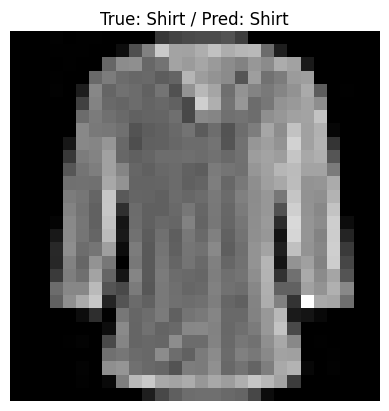

In [19]:
import matplotlib.pyplot as plt

# 클래스 이름 목록
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# 테스트셋에서 일부 데이터 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

# 모델을 eval 모드로
model.eval()

# 예측하기
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 이미지 5개 출력 (정답, 예측 비교)
for i in range(5):
    img = images[i].squeeze()  # 1채널을 없애기
    true_label = labels[i].item()
    pred_label = predicted[i].item()
    
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {classes[true_label]} / Pred: {classes[pred_label]}")
    plt.axis('off')
    plt.show()


틀린 개수: 4개


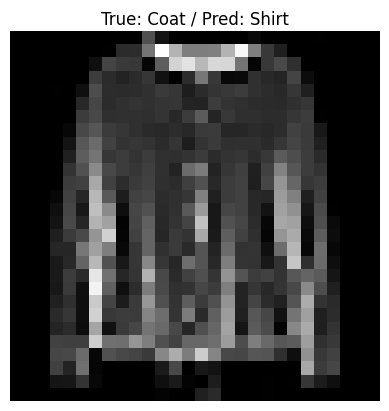

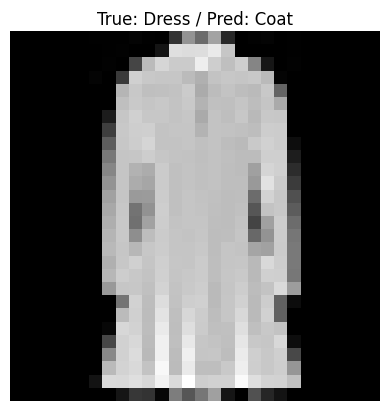

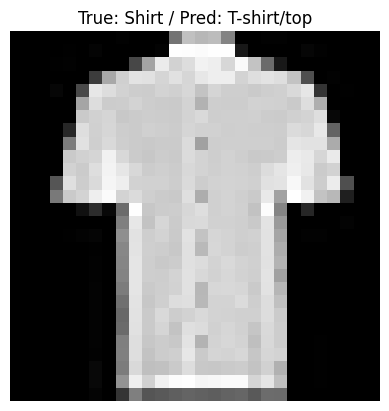

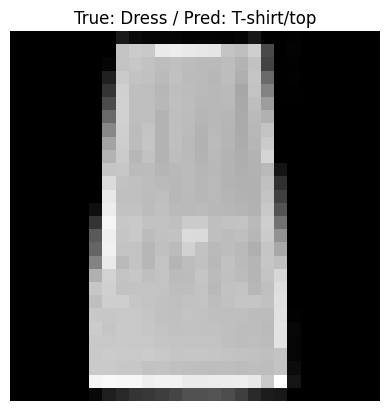

In [20]:
import matplotlib.pyplot as plt

# 클래스 이름 목록
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# 테스트 데이터 하나 가져오기
dataiter = iter(test_loader)
images, labels = next(dataiter)

model.eval()

# 모델 예측
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# 틀린 인덱스 찾기
incorrect = (predicted != labels).nonzero(as_tuple=False).squeeze()

print(f"틀린 개수: {len(incorrect)}개")

# 틀린 것 중 5개만 시각화
for idx in incorrect[:5]:
    img = images[idx].squeeze()
    true_label = labels[idx].item()
    pred_label = predicted[idx].item()
    
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {classes[true_label]} / Pred: {classes[pred_label]}")
    plt.axis('off')
    plt.show()
